## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Importing dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()

3


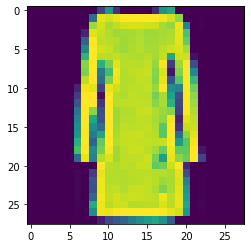

In [3]:
ran = np.random.randint(0, X_train.shape[0])
print(Y_train[ran])
plt.imshow(X_train[ran])

### Data preprocessing

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [6]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [7]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [8]:
print(Y_test[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Data Augmentation

In [10]:
img_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

## Designing model

In [15]:
model = tf.keras.Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2), padding='valid'),

        Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=(2, 2), padding='valid'),

        Flatten(),
        Dropout(0.2),
        Dense(1024, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
])

### Compilling model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)       

## Train model

In [18]:
model.fit(X_train, Y_train, batch_size=64,epochs=50, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
938/938 [==============================] - 16s 16ms/step - loss: 0.4097 - accuracy: 0.8611 - val_loss: 0.3062 - val_accuracy: 0.8868
Epoch 2/50
938/938 [==============================] - 14s 15ms/step - loss: 0.2517 - accuracy: 0.9087 - val_loss: 0.2645 - val_accuracy: 0.9024
Epoch 3/50
938/938 [==============================] - 14s 15ms/step - loss: 0.2118 - accuracy: 0.9225 - val_loss: 0.2742 - val_accuracy: 0.9003
Epoch 4/50
938/938 [==============================] - 14s 15ms/step - loss: 0.1900 - accuracy: 0.9296 - val_loss: 0.2281 - val_accuracy: 0.9191
Epoch 5/50
938/938 [==============================] - 14s 15ms/step - loss: 0.1608 - accuracy: 0.9407 - val_loss: 0.2340 - val_accuracy: 0.9211
Epoch 6/50
938/938 [==============================] - 14s 15ms/step - loss: 0.1443 - accuracy: 0.9467 - val_loss: 0.2282 - val_accuracy: 0.9246
Epoch 7/50
938/938 [==============================] - 14s 15ms/step - loss: 0.1266 - accuracy: 0.9533 - val_loss: 0.2322 - val_accuracy:

In [19]:
model.fit(img_generator.flow(X_train, Y_train, batch_size=64), epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
938/938 [==============================] - 33s 35ms/step - loss: 0.6865 - accuracy: 0.7651 - val_loss: 0.3040 - val_accuracy: 0.8927
Epoch 2/50
938/938 [==============================] - 31s 33ms/step - loss: 0.4724 - accuracy: 0.8295 - val_loss: 0.2835 - val_accuracy: 0.9000
Epoch 3/50
938/938 [==============================] - 31s 33ms/step - loss: 0.4171 - accuracy: 0.8492 - val_loss: 0.2641 - val_accuracy: 0.9020
Epoch 4/50
938/938 [==============================] - 31s 33ms/step - loss: 0.3878 - accuracy: 0.8605 - val_loss: 0.2478 - val_accuracy: 0.9092
Epoch 5/50
938/938 [==============================] - 31s 33ms/step - loss: 0.3652 - accuracy: 0.8675 - val_loss: 0.2439 - val_accuracy: 0.9111
Epoch 6/50
938/938 [==============================] - 31s 33ms/step - loss: 0.3429 - accuracy: 0.8757 - val_loss: 0.2569 - val_accuracy: 0.9052
Epoch 7/50
938/938 [==============================] - 32s 34ms/step - loss: 0.3334 - accuracy: 0.8798 - val_loss: 0.2438 - val_accuracy:

In [26]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2029 - accuracy: 0.9309


[0.20289623737335205, 0.930899977684021]